In [1]:
from torch import nn
import torch
import gym
from collections import deque
import itertools
import numpy as np
import random
import torch.nn.functional as F
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
ENV_Name='Acrobot-v1'
torch.manual_seed(2)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
env = gym.make(ENV_Name)
env.seed(0)
env.env.book_or_nips = 'nips'

/home/imaging/anaconda3/lib/python3.11/site-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/imaging/anaconda3/lib/python3.11/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/imaging/anaconda3/lib/python3.11/site-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


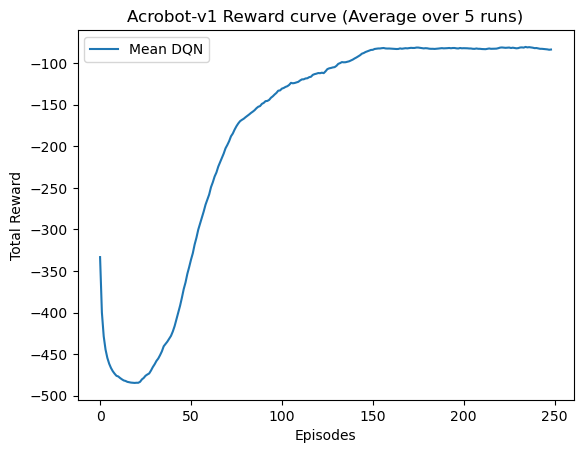

In [3]:
Iterations =5
Mean_Flag = True
mean_Plot_array = []
for k in range(Iterations):
    file_name = f'./npy/Q1_itertaion_{k}_mean_{Mean_Flag}_{ENV_Name}_.npy'
    loaded_array = np.load(file_name)
    mean_Plot_array.append(loaded_array)

mean_scrs = np.mean(mean_Plot_array,axis = 0)

plt.plot(mean_scrs,label='Mean DQN')
plt.legend()
plt.ylabel ('Total Reward')
plt.xlabel('Episodes')
plt.title(f'{ENV_Name} Reward curve (Average over {Iterations} runs)')
plt.savefig('Mean_DQN_CartPole-v0.png')
plt.show()

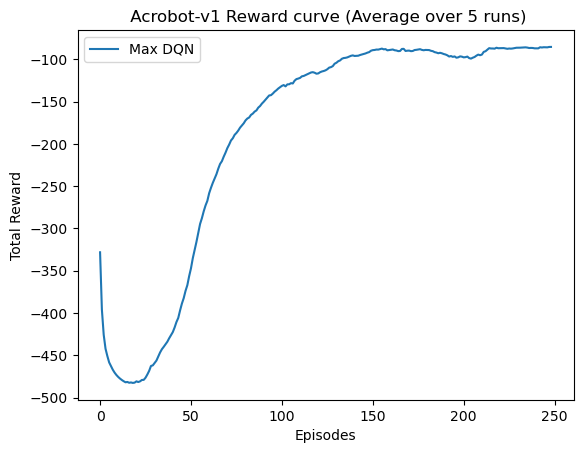

In [4]:
Mean_Flag = False
max_Plot_array = []
for k in range(Iterations):
    file_name = f'./npy/Q1_itertaion_{k}_mean_{Mean_Flag}_{ENV_Name}_.npy'
    loaded_array = np.load(file_name)
    max_Plot_array.append(loaded_array)


max_scrs = np.mean(max_Plot_array,axis = 0)

plt.plot(max_scrs,label='Max DQN')
plt.legend()
plt.ylabel ('Total Reward')
plt.xlabel('Episodes')
plt.title(f' {ENV_Name} Reward curve (Average over {Iterations} runs)')
plt.savefig('Max_DQN_CartPole-v0.png')
plt.show()

In [4]:
Mean_Flag = True
mean_Plot_array = []
for k in range(Iterations):
    file_name = f'./npy/Q1_itertaion_{k}_mean_{Mean_Flag}_{ENV_Name}_.npy'
    loaded_array = np.load(file_name)
    mean_Plot_array.append(loaded_array)

Mean_Flag = False
max_Plot_array = []
for k in range(Iterations):
    file_name = f'./npy/Q1_itertaion_{k}_mean_{Mean_Flag}_{ENV_Name}_.npy'
    loaded_array = np.load(file_name)
    max_Plot_array.append(loaded_array)

mean_scrs = np.mean(mean_Plot_array,axis = 0)
max_scrs = np.mean(max_Plot_array,axis = 0)

plt.plot(mean_scrs,label='Mean DQN')
plt.plot(max_scrs,label='Max DQN')
plt.legend()
plt.ylabel ('Total Reward')
plt.xlabel('Episodes')
plt.title(f' {ENV_Name} Reward curve (Average over {Iterations} runs)')
plt.savefig('DQN_CartPole-v0.png')
plt.show()

NameError: name 'Iterations' is not defined

In [6]:
class DuelingDQN_Mean(nn.Module):
    def __init__(self, env):
        super(DuelingDQN_Mean, self).__init__()

        in_features = int(np.prod(env.observation_space.shape))

        self.fc1 = nn.Linear(in_features, 128)
        self.fc2 = nn.Linear(128, 128)

        self.fc3 = nn.Linear(128, 128)
        '''Value stream'''
        self.value_stream = nn.Linear(128, 1)

        '''Advantage stream'''
        self.advantage_stream = nn.Linear(128, env.action_space.n)

    def forward(self, state):
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))


        value = self.value_stream(x)
        advantage = self.advantage_stream(x)

        '''Combining value and advantage streams'''
        q_values = value + (advantage - advantage.mean(dim=1, keepdim=True))
        # q_values = value + (advantage - advantage.max(dim=1, keepdim=True)[0])

        return q_values
    
    def act(self, obs):
        obs_t = torch.as_tensor(obs, dtype=torch.float32)
        q_values = self(obs_t.unsqueeze(0))
        max_q_index = torch.argmax(q_values, dim=1)[0]
        action = max_q_index.cpu().detach().item()
        return action


student_pretrained_statedict = torch.load('./All_ckpt/iteration_4_Acrobot-v1_Qmean_best_checkpoint__.pth')
online_net = DuelingDQN_Mean(env).to(device)
online_net.load_state_dict(student_pretrained_statedict['state_dict'])


<All keys matched successfully>

In [7]:
# obs = env.reset()
# episode_length = 0
# for i in range(5000):
#     print(f'episode_length {episode_length}')
#     episode_length +=1
#     obs = torch.as_tensor(obs, dtype=torch.float32).to(device)
#     action = online_net.act(obs)

#     obs, _, done, _ = env.step(action)
#     env.render()
#     if done: 
#         env.reset()
#         episode_length = 0

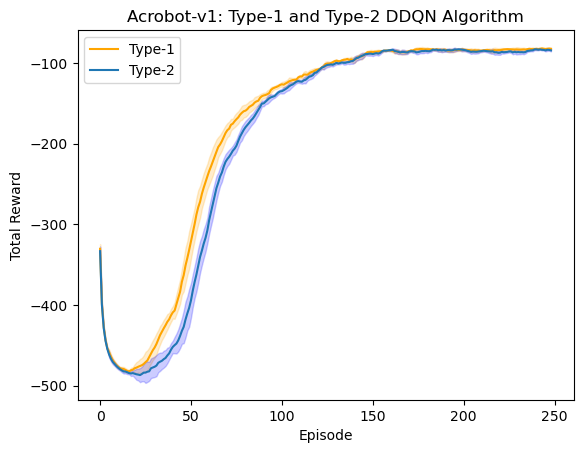

In [6]:
 # mean_rewards_without_baseline = np.mean(rewards_list_without_baseline, axis=0)
 #    std_rewards_without_baseline = np.std(rewards_list_without_baseline, axis=0)
Mean_Flag = True
mean_Plot_array = []
for k in range(5):
    file_name = f'./npy/Q1_itertaion_{k}_mean_{Mean_Flag}_{ENV_Name}_.npy'
    loaded_array = np.load(file_name)
    mean_Plot_array.append(loaded_array)

Mean_Flag = False
max_Plot_array = []
for k in range(5):
    file_name = f'./npy/Q1_itertaion_{k}_mean_{Mean_Flag}_{ENV_Name}_.npy'
    loaded_array = np.load(file_name)
    max_Plot_array.append(loaded_array)

mean_scrs = np.mean(mean_Plot_array,axis = 0)
std_mean_scrs = np.std(mean_Plot_array, axis=0)

max_scrs = np.mean(max_Plot_array,axis = 0)
std_max_scrs = np.std(mean_Plot_array,axis= 0)



    # Plot mean rewards with different colors
plt.plot(mean_scrs, label='Type-1', color='orange')
plt.plot(max_scrs, label='Type-2')

# Plot shaded regions for variance (mean +/- std) for both cases
plt.fill_between(range(len(mean_scrs)),
                 mean_scrs - std_mean_scrs,
                 mean_scrs + std_mean_scrs,
                 color='orange', alpha=0.2)

plt.fill_between(range(len(max_scrs)),
                 max_scrs - std_max_scrs,
                 max_scrs + std_max_scrs,
                 color='blue', alpha=0.2)

# Customize plot
plt.title("Acrobot-v1: Type-1 and Type-2 DDQN Algorithm")
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.legend()
plt.savefig('DQN_CartPole-std.png')
plt.show()